In [19]:
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

In [20]:
! mamba install pandas==1.3.3 -y
! mamba intall numpy =1.21.2 -y
! mamba install sklearn =0.20.1 -y
! mamba install ipywidgets =7.4.2 -y
! mamba install tqdm

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [21]:
import pandas as pd
import numpy as np

In [22]:
from pyodide.http import pyfetch

async def download(url,filename):
    response = await pyfetch(url)
    if response.status ==200:
        with open (filename,'wb') as f:
            f.write(await response.bytes())

In [23]:
import pandas as pd
import numpy as np

In [24]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [25]:
# downloading the datasert 

await download(path, 'auto.csv')
path = 'auto.csv'

In [26]:
df = pd.read_csv(path)

In [27]:
df.to_csv('model_5_auto_csv')

In [28]:
# Only using metric data 

df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [29]:
# Import libraries for plotting

from ipywidgets import interact, interactive, fixed, interact_manual

In [30]:
def DistributionPlot(RedFunction, RedName, BlueName, Title):
    width=12
    height= 10
    plt.figure(figsize=(width,height))
    
    ax1 = sns.displot(RedFunction, Hist=False, color ='r', label=RedName)
    ax2 = sns.displot(BuleFunction, hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title
    plt.xlabel('price(in dollars')
    plt.ylabel('Proportion of cars')
    
    plt.show()
    plt.close()
    


In [32]:
def PolyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width - 12
    height = 10
    plt.figure(figure=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.mean(), xtest.values.min()])
    
    x=np.arrange(xmin,max, 0.1)
    
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='test data')
    plt.plot(x, lr.predict(poly_trandform.fit_transform(x.reshape(-1,1))), label='predicted function')
    plt.ylim([-10000,60000])
    plt.ylabel('price')
    plt.legend()

In [33]:
# Place the target price in a separate dataframe y_data
# Training and testing data 

y_data = df['price']

In [34]:
# Dropping price data in dataframe x_data

x_data= df.drop('price',axis=1)

In [41]:
# Randomly splitting the data into training and testing data 
# use train_test_data
# testing set is 10% of the total dataset


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size = 0.10, random_state=1)

print('NUMBER OF TEST SAMPLES:', x_test.shape[0])
print('NUMBER OF TRAINING SAMPLES:', x_train1.shape[0])

NUMBER OF TEST SAMPLES: 21
NUMBER OF TRAINING SAMPLES: 120


## Q#1

Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [42]:
x_train1, x_test1, y_test1, y_train1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)
print('NUMEBER OF TEST SAMPLES:', x_test1.shape[0])
print('NUMBER OF TRAINING SAMPLES:',x_train1.shape[0])

NUMEBER OF TEST SAMPLES: 81
NUMBER OF TRAINING SAMPLES: 120


In [49]:
# importing linear regression model
# create object
# fit the model using the feature horsepower
# calculate the r2
# compare the r2 test asnd training data 

from sklearn.linear_model import LinearRegression

lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
lre.score(x_test[['horsepower']], y_test)
lre.score(x_train[['horsepower']],y_train)
print('R^2 is:', lre.score(x_train[['horsepower']],y_train))

R^2 is: 0.6619724197515103


In [50]:
# R2rd is buch smaller than using the data compared to teh data. 


## Q#2

Find the R^2 on the test data using 40% of the dataset for testing.

In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

## Cross-Validation Score

In [70]:
# import model_selection from the model cross_val_score

from sklearn.model_selection import cross_val_score

In [75]:
# input object n the feature 'horsepower'
# the target y_data w/ perameter cv with 4 number of fold
# show R^2

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [78]:
# calculate the avg and the STDeviation

print('the mean of the folds are:', Rcross.mean(), 'and the STDeviation is:',Rcross.std())

the mean of the folds are: 0.5220099150421197 and the STDeviation is: 0.29118394447560203


In [82]:
# use the negative squared error by setting the perameter 
# ---'scoring metric to Neg_mean_squared_error or nmse

-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

array([-0.7746232 , -0.51716687, -0.74785353, -0.04839605])

## Q#3

Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [85]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross

array([0.59015621, 0.44319613])

In [87]:
# finding hte average

Rcross.mean()

0.5166761697127429

In [89]:
## use the function 'cross_val_predict' to predict the output. 
# The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training

from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting and Model Selection
Examlpes of Multiple linear regression and Plolynominal regression

In [117]:
# create multiple linear regression and train the model using
# horsepower, curb-weight, engine-size, and highway-mpg as features.
# Predict using test data

lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression()

In [118]:

yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [124]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [127]:
# Use model evaluation using the training and testing data separately.
# First import seaborn and matplotlib for plotting 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
import seaborn as sns
sns.set_theme()

In [143]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

<class 'TypeError'>: DistributionPlot() takes 4 positional arguments but 5 were given

In [144]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<class 'TypeError'>: DistributionPlot() takes 4 positional arguments but 5 were given

In [146]:
from sklearn.preprocessing import PolynomialFeatures

## OverFitting 
this is when the model fits the noise but not the underlying process
When you use the test set your model does not perform well since it is modeling noise
creat a 5 degree polynomial model

In [160]:
# use 55% of the data for training and the rest for testing 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.55, random_state=0)

In [161]:
# perform a 5 degree ploynomial 

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [162]:
# create linearREGRESSION 'poly' to train it 

poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [163]:
# use 'predict' to see the output of hte model but assign values 'yhat'

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6441.58146509,  7052.84106798, 12145.74642683, 18348.95570143,
       19587.83679043])

In [164]:
print('predicted values:', yhat[0:4])
print('True values:', y_test[0:4].values)

predicted values: [ 6441.58146509  7052.84106798 12145.74642683 18348.95570143]
True values: [ 6295. 10698. 13860. 13499.]


In [182]:
PolyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

<class 'NameError'>: name 'width' is not defined

In [183]:
# R^2 the training data

poly.score(x_train_pr, y_train)

0.5682646623807648

In [184]:
poly.score(x_test_pr,y_test)

-38.23542304590674

The R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

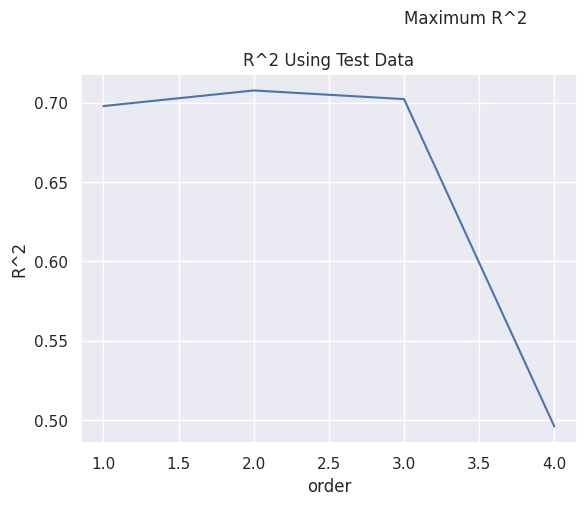

In [188]:
# Plot the results of different order polynomials and the changes on the test data

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [229]:
# RUN THE FUNCTION 

def f(order, test_data):
    
    x_train, y_train, x_test, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures (degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_train = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [230]:
interact(f, order=(0,6,1), test_data =(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<class 'KeyError'>: "None of [Index(['horsepower'], dtype='object')] are in the [index]"

## Q #4a-f


In [250]:
# Can perform polynomial transformation with more than one feature.
# create a poltnomialFeatures object pr1 of degree 2

pr1=PolynomialFeatures(degree=2)

In [274]:
# Transform the training and testing samples for the features
# 'Horespower','curb-weight', 'engine-size', 'engine-size', and 'highway-mpg'

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<ipython-input-274-fb772f128913>:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


<class 'IndexError'>: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [275]:
# what are the dimensions does the feature have

x_train_pr1.shape
                                

(90, 15)

In [271]:
# d.# create a linear regression model 'poly1'. train the object 
# using the method  'fit' using the poly features

poly1 = LinearRegression().fit(x_train_pr1, y_train)
 

In [272]:
# use the method predict to predict an output on the polynomial features, 
#then use the function

yhat_test1 = poly1.predict(x_test_pr1)
yhat_test1[0:5]


<class 'NameError'>: name 'x_test_pr1' is not defined

In [273]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, 'Actual Values (Test)', 'Preddicted Values (Test)', Title)

<class 'TypeError'>: DistributionPlot() takes 4 positional arguments but 5 were given

In [267]:
# Use the 'DistributionPlot to describe the the two regions 
# where the predicted places are less accurate than the actual prices

#The plot about shows that there is a decent fit to the histogram, at the end of the cureve the prices may be not accurate.
#but the plot is noto verfitted nor underfitted. 

print("predicted values:",yhat[0:4])
print("True values:",y_test[0:4].values)


predicted values: [ 6441.58146509  7052.84106798 12145.74642683 18348.95570143]
True values: [ 6295. 10698. 13860. 13499.]


## Ridge Regression
In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data

In [278]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

<ipython-input-278-e5fc8582f453>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


<class 'IndexError'>: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [285]:
# Import Ridge from the model linear models
# Create a ridge regression
# fit the ridge tegression
# Obtain a prediction
# compare the first 5 predicted samples to our test

from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)


Ridge(alpha=1)

In [287]:
yhat = RigeModel.predict(x_test_pr)


<class 'ValueError'>: X has 5 features, but Ridge is expecting 28 features as input.

In [288]:
print('predicted values:', yhat[0:4])
print('test set:', y_test[0:4])

predicted values: [ 6441.58146509  7052.84106798 12145.74642683 18348.95570143]
test set: 18      6295.0
170    10698.0
107    13860.0
98     13499.0
Name: price, dtype: float64


In [289]:
## We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

<ipython-input-289-e0c60797668d>:7: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  pbar = tqdm(Alpha)
  0%|          | 0/1000 [00:00<?, ?it/s]


<class 'ValueError'>: X has 5 features, but Ridge is expecting 28 features as input.

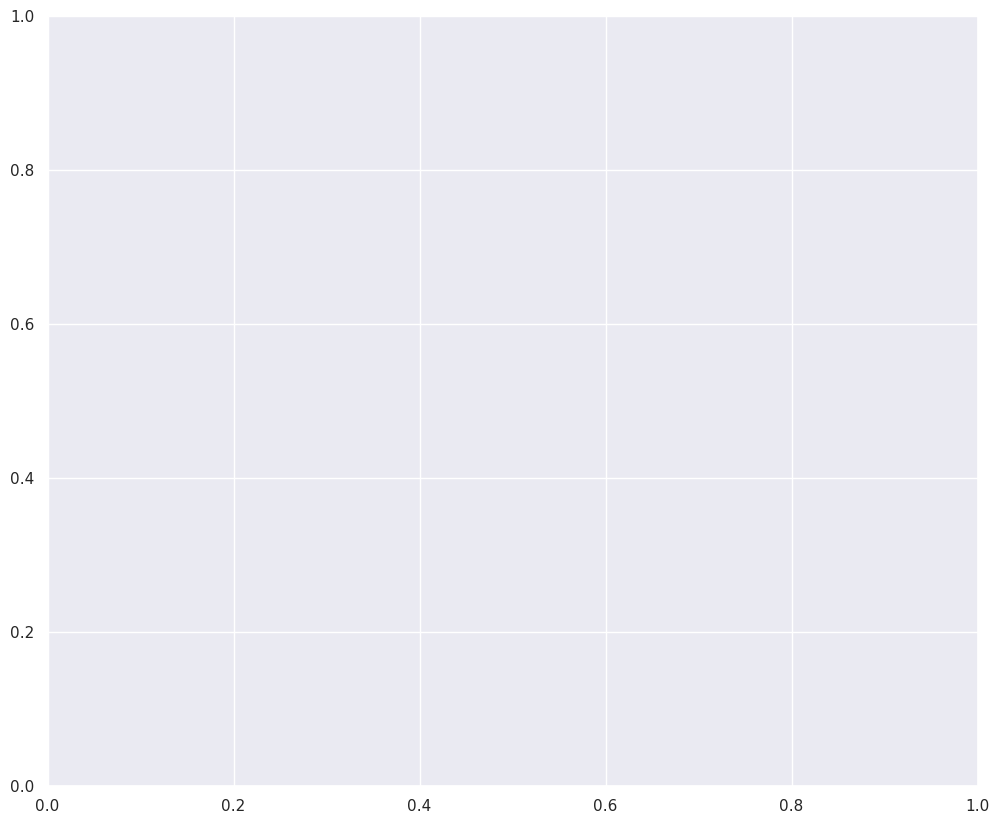

<class 'ValueError'>: x and y must have same first dimension, but have shapes (1000,) and (0,)

In [291]:
## We can plot out the value of R^2 for different alphas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [292]:
## Perform Ridge regression. Calculate the R^2 using the polynomial features, 
# use the training data to train the model and use the test data to test the model. 
# The parameter alpha should be set to 10.


RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

<class 'ValueError'>: X has 5 features, but Ridge is expecting 28 features as input.